In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.autograd import Variable

# make fake data
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np



In [2]:
with open("两种方法的测试记录_逐级删除.txt")as f:
    data = eval(f.read())
f1 = data["f1"]
forword_pro= data["forword_pro"]
backword_pro= data["backword_pro"]
sun_pro= data["sun_pro"]


In [3]:
target = []
index_bestf1 = []
train = []
"""先把不是第0个最好结果的提出来"""
for i in range(len(data["f1"])):
    """首先提出最好的f1的index"""
    index_bestf1 = data["f1"][i].index(max(data["f1"][i]))
    if index_bestf1 != 0:
        target.append(index_bestf1)
        train.append(data["forword_pro"][i])
        

"""提取剩余0个就是最好的结果，提取到300就截止，不然太多了"""
for i in range(len(data["f1"])):
    """首先提出最好的f1的index"""
    index_bestf1 = data["f1"][i].index(max(data["f1"][i]))
    if index_bestf1 == 0 and len(train) < 300:
        target.append(index_bestf1)
        train.append(data["forword_pro"][i])
train = np.array(train)
target = np.array(target)
print("target: " , len(target), "train : ", len(train))
print("target: " , type(target), "train : ", type(train))

target:  300 train :  300
target:  <class 'numpy.ndarray'> train :  <class 'numpy.ndarray'>


In [4]:
# 特征降维——主成分分析
transfer_1 = PCA(n_components=2)
train = torch.from_numpy(train)
print(type(train))
train = transfer_1.fit_transform(train)
x = torch.from_numpy(train)
y = torch.from_numpy(target)
print(type(x), type(y))
x, y = Variable(x), Variable(y)
print(x.shape, y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([300, 2]) torch.Size([300])


Sequential(
  (0): Linear(in_features=2, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=11, bias=True)
)
0.09666666666666666


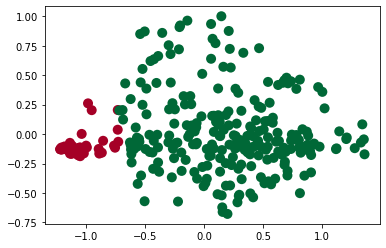

0.25333333333333335


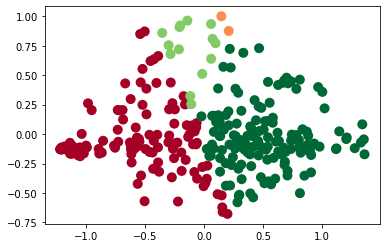

0.25666666666666665


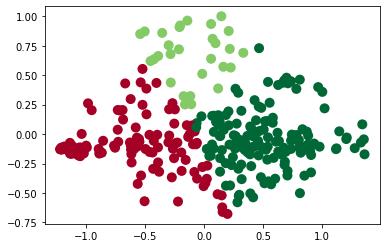

0.26


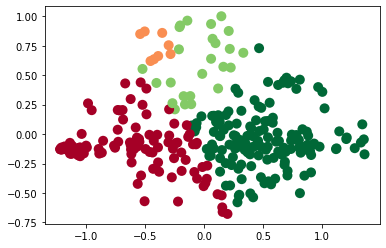

0.26666666666666666


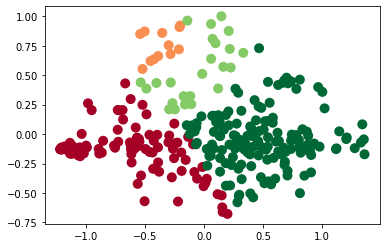

0.2733333333333333


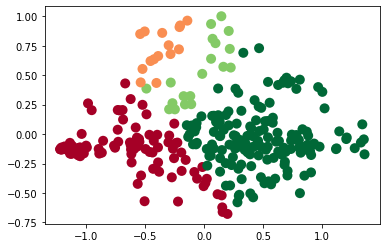

0.27666666666666667


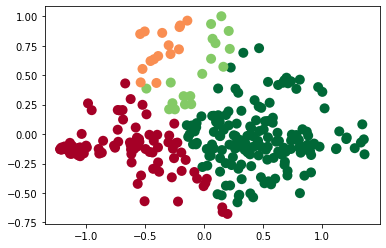

0.28


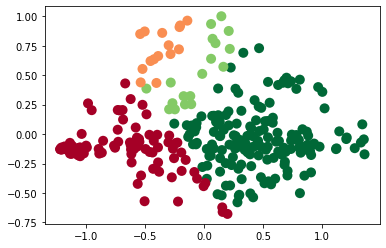

0.27666666666666667


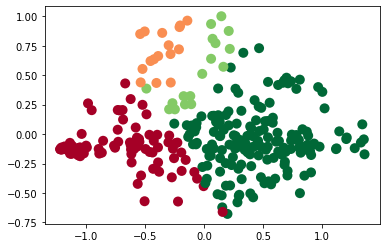

0.2733333333333333


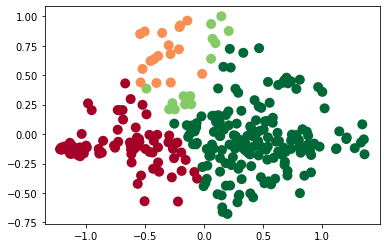

0.27


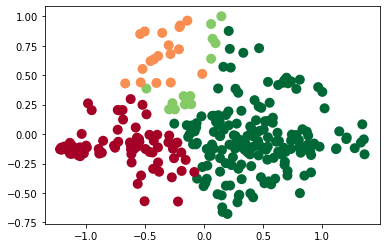

0.26666666666666666


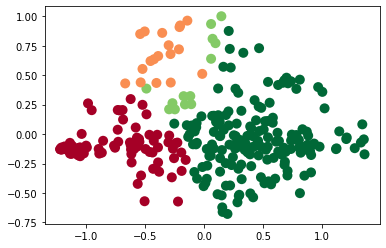

0.26666666666666666


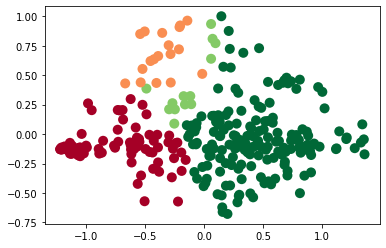

0.26666666666666666


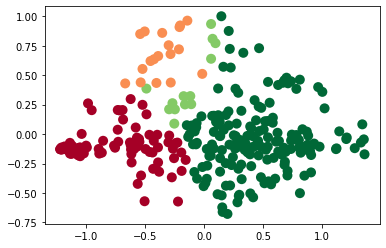

0.2733333333333333


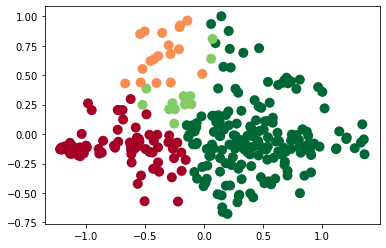

In [12]:
# mehod
net = torch.nn.Sequential(
    torch.nn.Linear(2, 500),
    torch.nn.ReLU(),
    torch.nn.Linear(500, 11),
)
# net1 = Net(n_feature=2, n_hidden=10, n_output=3)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 随机梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

for t in range(150):
    out = net(x.float())  # input x and predict based on x
    loss = loss_func(out, y.long())  # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        print(accuracy)

        plt.pause(0.1)

plt.show()
torch.save(net, 'net.pkl')  # save entire net
torch.save(net.state_dict(), 'net_params.pkl')  # save only the parameters
net1 = torch.load('net.pkl')  # 加载神经网络

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)
torch.Size([3356, 2]) torch.Size([3356])
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=11, bias=True)
)
0.008045292014302742


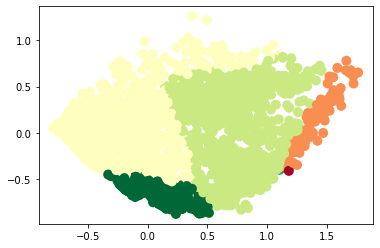

0.9275923718712753


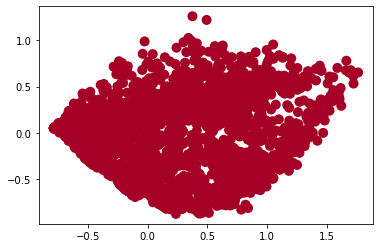

0.9275923718712753


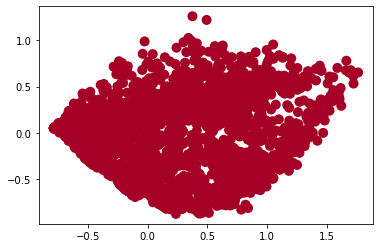

0.9275923718712753


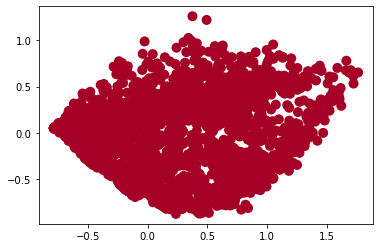

0.9275923718712753


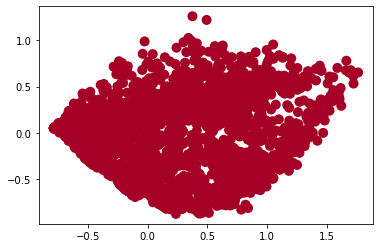

0.9275923718712753


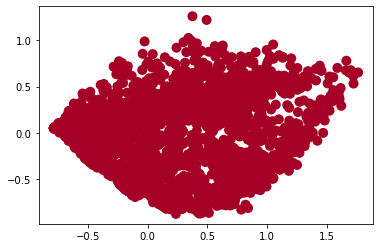

0.9275923718712753


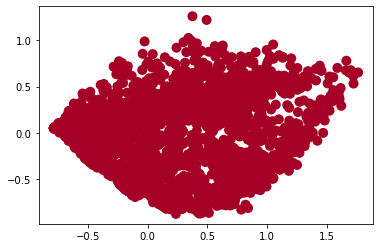

0.9275923718712753


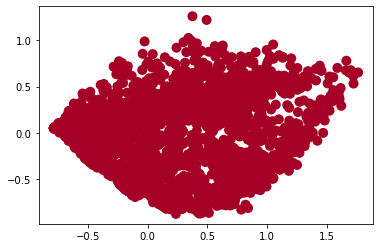

0.9275923718712753


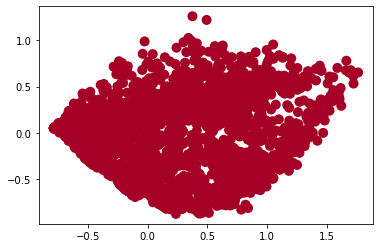

0.9275923718712753


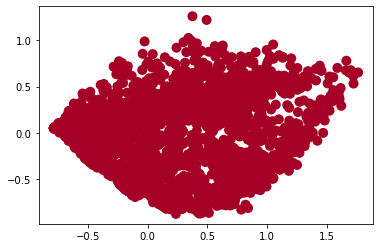

0.9275923718712753


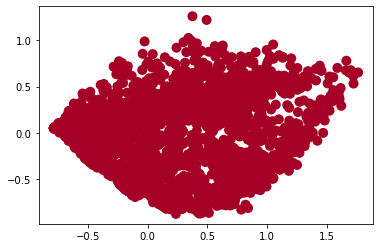

0.9275923718712753


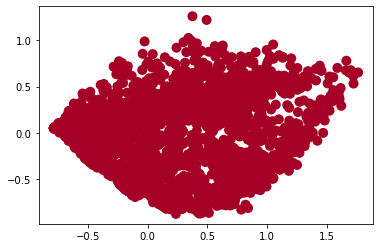

0.9275923718712753


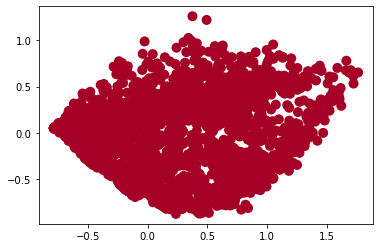

0.9275923718712753


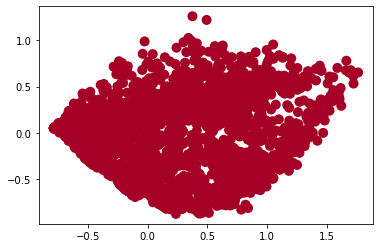

0.9275923718712753


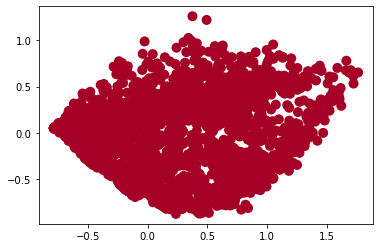

In [13]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.autograd import Variable

# make fake data
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
iris_d = pd.DataFrame(iris['data'], columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_d['Species'] = iris.target

# 特征降维——主成分分析
transfer_1 = PCA(n_components=2)
iris_d = transfer_1.fit_transform(iris_d)
x = torch.from_numpy(iris_d)
y = torch.from_numpy(iris.target)
x, y = Variable(x), Variable(y)

# mehod
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 3),
)
# net1 = Net(n_feature=2, n_hidden=10, n_output=3)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 随机梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

with open("两种方法的测试记录_逐级删除.txt")as f:
    data = eval(f.read())
f1 = data["f1"]
forword_pro= data["forword_pro"]
backword_pro= data["backword_pro"]
sun_pro= data["sun_pro"]

target = []

train_forword_pro = np.array(forword_pro)
train_backword_pro = np.array(backword_pro)
train_sun_pro = np.array(sun_pro)

for i in f1:
    index_bestf1 = i.index(max(i))
    target.append(index_bestf1)
target = np.array(target)

# 特征降维——主成分分析
transfer_1 = PCA(n_components=2)
train_forword_pro = transfer_1.fit_transform(train_forword_pro)
train_forword_pro = torch.from_numpy(train_forword_pro)
target = torch.from_numpy(target)
x, y = Variable(train_forword_pro), Variable(target)
print(train_forword_pro.shape, target.shape)

# mehod
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 11),
)
# net1 = Net(n_feature=2, n_hidden=10, n_output=3)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 随机梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

for t in range(150):
    out = net(x.float())  # input x and predict based on x
    loss = loss_func(out, y.long())  # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        print(accuracy)

        plt.pause(0.1)

plt.show()
torch.save(net, 'net.pkl')  # save entire net
torch.save(net.state_dict(), 'net_params.pkl')  # save only the parameters
net1 = torch.load('net.pkl')  # 加载神经网络